<a href="https://colab.research.google.com/github/jithesh9539/Dimensionality_Reduction_Technique/blob/main/PCA_SVD_TSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA**

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.manifold import TSNE
import umap

In [56]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 15.8 MB 628 bytes/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 125 kB 62.1 MB/s 
     |████████████████████████████████| 791 kB 56.2 MB/s 
     |████████████████████████████████| 786 kB 59.6 MB/s 
     |████████████████████████████████| 779 kB 58.8 MB/s 
     |████████████████████████████████| 778 kB 66.6 MB/s 
     |████████████████████████████████| 776 kB 49.1 MB/s 
     |████████████████████████████████| 769 kB 58.1 MB/s 
     |████████████████████████████████| 766 kB 57.4 MB/s 
     |████████████████████████████████| 1.0 MB 59.4 MB/s 
     |████████████████████████████████| 722 kB 45.4 MB/s 
     |████████████████████████████████| 722 kB 44.2 MB/s 
     |████████████████████████████████| 715 kB 75.5 MB/s 
     |████████████████████████████████| 705 kB 55.5 MB/s 
     |██████████

     |████████████████████████████████| 125 kB 3.2 MB/s 
     |████████████████████████████████| 790 kB 29.9 MB/s 
     |████████████████████████████████| 374 kB 42.5 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.21 which is incompatible.
google-colab 1.0.0 requ

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Wine.csv to Wine.csv


In [5]:
df=pd.read_csv('Wine.csv')
df.shape

(178, 14)

In [6]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
x_Variables=df.iloc[:,1:14]

In [9]:
x_Variables

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
X = StandardScaler().fit_transform(x_Variables)

In [11]:
X.shape

(178, 13)

In [12]:
cov_matrix=np.cov(X.T)

In [13]:
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [14]:
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range (len(eigen_values))]
print('Eigenvalues in descending order:')
for i in eigen_pairs:
  print(i[0])

Eigenvalues in descending order:
4.732436977583593
2.5110809296451233
1.4542418678464695
0.9241658668248732
0.8580486765371116
0.6452822124678548
0.5541414662457851
0.10396199182075336
0.3504662749462543
0.16972373898012205
0.2905120326939765
0.22706428173088514
0.25232001036082513


In [15]:
pca=PCA()
pca=pca.fit(X)
explained_variance=pca.explained_variance_ratio_

In [16]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [17]:
  df1=pd.DataFrame({'variable':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})

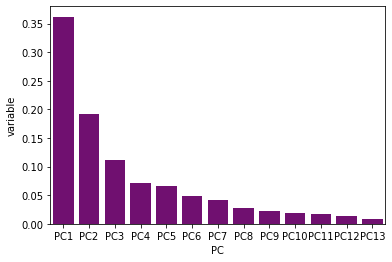

In [18]:
sns.barplot(x='PC',y="variable",data=df1,color="purple");

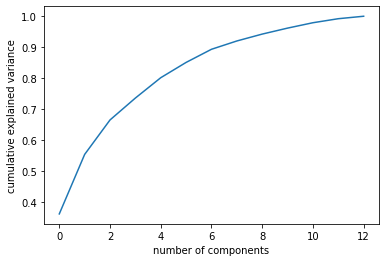

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [20]:
pca_2=PCA(n_components=2)
pca_2=pca_2.fit(X)
pca_2d=pca_2.transform(X)


In [21]:
pca_2d

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [22]:
PCA_dataset = pd.DataFrame(data = pca_2d, columns = ['component1', 'component2'] )
PCA_dataset.head()

,component1,component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [24]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']

<Figure size 432x288 with 0 Axes>

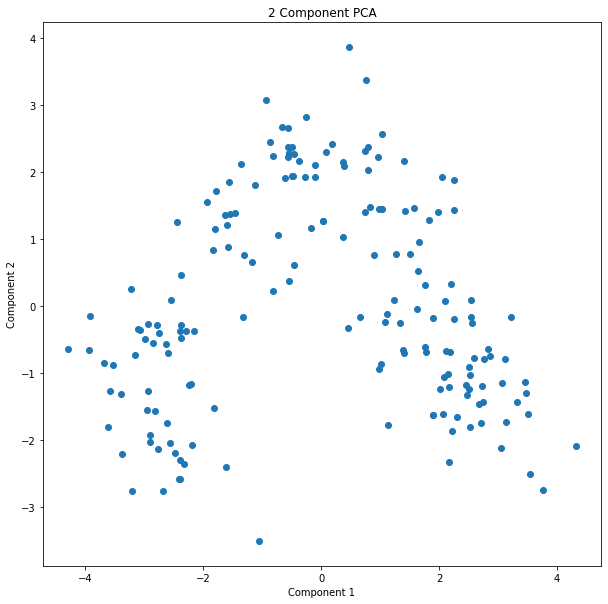

In [29]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset['component1'], PCA_dataset['component2'])

**SVD**

In [30]:
svd_df=pd.read_csv('Wine.csv')

In [31]:
svd_df.shape

(178, 14)

In [32]:
svd_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
x_var=svd_df.iloc[:,1:14]
y_var=svd_df.iloc[:,0]
scaler=StandardScaler()
x_feat=scaler.fit_transform(x_var)

In [37]:
u,s,v=np.linalg.svd(x_feat,full_matrices=True)

In [38]:
u.shape

(178, 178)

In [39]:
u

array([[-0.12601885,  0.07082407, -0.01476376, ..., -0.01882032,
        -0.02963174, -0.08609586],
       [-0.07497485, -0.01912163, -0.12256267, ...,  0.11575157,
         0.04651587,  0.14082687],
       [-0.08232436,  0.04802808,  0.07829489, ...,  0.08580915,
         0.02914877, -0.05582693],
       ...,
       [ 0.08466123,  0.1248798 , -0.05661571, ...,  0.93738156,
        -0.05319095, -0.0035262 ],
       [ 0.07590444,  0.11291678, -0.03112642, ..., -0.04986983,
         0.93955418, -0.00485545],
       [ 0.09748019,  0.1324618 ,  0.06832091, ...,  0.00396895,
        -0.00252008,  0.93415922]])

In [63]:
s.shape

(13,)

In [68]:
s

array([29.18913936, 21.78207432, 15.46781744, 12.81749842, 11.92404679,
       10.28039428,  9.47059664,  7.72543264,  7.24178536,  6.82325826,
        6.41563168,  5.4709025 ,  4.08147259])

In [66]:
v.shape


(13, 13)

In [67]:
v

array([[-0.18319178,  0.21572905, -0.00984424,  0.27310161, -0.15507622,
        -0.39446911, -0.42230957,  0.29437675, -0.33391639,  0.02229073,
        -0.29298689, -0.35733143, -0.2739319 ],
       [ 0.4479031 ,  0.28029175,  0.31926962, -0.01219498,  0.3189989 ,
         0.00902362, -0.01989965,  0.05048114, -0.01378   ,  0.53132673,
        -0.27084654, -0.16946282,  0.35969153],
       [-0.18038902,  0.16013907,  0.62424916,  0.57755803,  0.11767737,
         0.18183595,  0.13367089,  0.14930462,  0.19073265, -0.18234683,
         0.0624406 ,  0.19451979, -0.14183387],
       [ 0.06384466,  0.51657828, -0.27173399,  0.05224837, -0.38313934,
         0.17476087,  0.16308724, -0.19415711,  0.31410988,  0.08901159,
        -0.4551079 ,  0.20939998, -0.23089024],
       [-0.26384508,  0.13046337, -0.10849307,  0.05722044,  0.64859149,
        -0.14721272, -0.08144697, -0.61785258, -0.04055533, -0.13750356,
        -0.18862175, -0.00495983, -0.10699298],
       [ 0.1878337 ,  0.534435

In [42]:
var_explained=np.round(s**2/np.sum(s**2),decimals=3)
var_explained

array([0.368, 0.205, 0.103, 0.071, 0.061, 0.046, 0.039, 0.026, 0.023,
       0.02 , 0.018, 0.013, 0.007])

Text(0, 0.5, 'Percent of the variance explained')

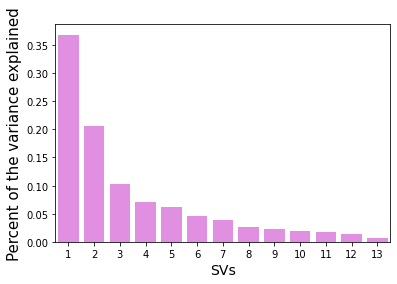

In [43]:
sns.barplot(x=list(range(1,len(var_explained)+1)),y=var_explained,color="violet")
plt.xlabel('SVs',fontsize=14)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [73]:
col_lab=['SV'+str(i) for i in range(1,3)]
svd_df1 = pd.DataFrame(u[:,0:2], index=svd_df["class"].tolist(), columns=col_lab)
svd_df1=svd_df1.reset_index()
svd_df1.rename(columns={'index':'Class'},inplace=True)
svd_df1.head(100)



,Class,SV1,SV2
0,0,-0.126019,0.070824
1,0,-0.074975,-0.019122
2,0,-0.082324,0.048028
3,0,-0.123259,0.111359
4,0,-0.036195,0.048175
...,...,...,...
95,1,-0.061951,-0.029746
96,1,0.025562,-0.006207
97,1,-0.034078,-0.133797
98,1,-0.074960,-0.081090


**T-SNE**

In [45]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [46]:
tsne_transform = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.075523
[t-SNE] KL divergence after 300 iterations: 0.332090


In [47]:
tsne_transform

array([[ 10.621938  ,   8.99885   ],
       [  7.2985816 ,   6.5037827 ],
       [ 10.722053  ,   5.119495  ],
       [ 12.559738  ,   7.149989  ],
       [  8.414324  ,   2.3759358 ],
       [ 12.566779  ,   6.204408  ],
       [  9.182846  ,   6.149942  ],
       [ 11.10645   ,   2.8624628 ],
       [  9.509084  ,   6.7671785 ],
       [ 10.2914915 ,   7.0120816 ],
       [ 12.131982  ,   5.575193  ],
       [  8.693131  ,   5.3795953 ],
       [  9.271447  ,   5.294221  ],
       [ 13.363573  ,   7.8622813 ],
       [ 13.687454  ,   7.406764  ],
       [ 11.718042  ,   3.7214255 ],
       [ 10.984495  ,   3.9808545 ],
       [ 10.518337  ,   3.4171295 ],
       [ 13.147479  ,   5.380463  ],
       [  8.406564  ,   8.930575  ],
       [ 10.14163   ,   8.984147  ],
       [  4.967687  ,   6.13558   ],
       [  8.077768  ,   5.9973183 ],
       [  6.9001136 ,   4.3713994 ],
       [  6.9992247 ,   3.8819606 ],
       [  5.6591787 ,   9.210531  ],
       [  8.9953575 ,   4.3836255 ],
 

In [48]:
tsne_set=pd.DataFrame(data=tsne_transform,columns=['Component1','Component2'])

In [49]:
tsne_set.head()

,Component1,Component2
0,10.621938,8.998850
1,7.298582,6.503783
2,10.722053,5.119495
3,12.559738,7.149989
4,8.414324,2.375936


In [50]:
##Extracting two features

tsne_comp1=tsne_set['Component1']
tsne_comp2=tsne_set['Component2']

<Figure size 432x288 with 0 Axes>

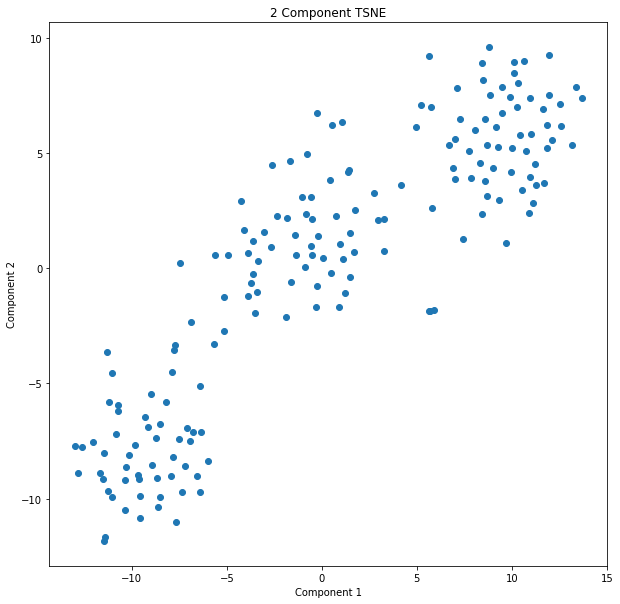

In [51]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_comp1, tsne_comp2)

**UMAP**

In [58]:
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [59]:
umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

In [60]:
umap_component1

array([-2.25571543e-01, -1.29696286e+00, -1.71509647e+00, -1.32596767e+00,
        2.00329781e+00, -1.82909429e+00, -1.66166759e+00, -1.72416961e+00,
       -1.21525633e+00, -9.04167831e-01, -2.41575551e+00, -2.80619431e+00,
       -2.35682011e+00, -1.81836188e+00, -1.63775623e+00, -2.68156195e+00,
       -2.03084421e+00, -2.36546230e+00, -2.41993999e+00, -5.61950445e-01,
       -1.74014255e-01, -5.41911244e-01, -1.24382687e+00, -1.19449341e+00,
       -8.65210474e-01,  2.28414726e+00, -1.78308356e+00, -2.59677005e+00,
       -1.46843791e+00, -1.35670388e+00, -2.55272627e+00, -2.34609604e+00,
       -2.22526574e+00, -2.07481050e+00, -2.18505406e+00, -8.77119243e-01,
       -2.01438951e+00, -2.56142211e+00, -2.18815112e+00, -2.94275641e-01,
       -1.18514560e-01, -5.66960633e-01, -1.17486763e+00, -2.17671812e-01,
       -2.70047098e-01, -4.08018023e-01, -8.22904766e-01, -8.06857824e-01,
       -1.60398352e+00, -1.88233149e+00, -1.37003410e+00, -2.22305512e+00,
       -1.23688114e+00, -

In [61]:
umap_component2

array([10.959434 , 10.190912 , 10.481937 , 10.943414 ,  7.7905593,
       10.439565 , 10.973496 ,  9.555701 , 11.523553 , 11.1316805,
       11.1239805, 10.949569 , 10.989059 , 11.511625 , 11.34587  ,
        9.557663 ,  9.556303 ,  9.299406 , 10.527178 , 10.128996 ,
       10.661089 ,  8.216731 ,  9.803579 ,  9.195456 ,  8.826173 ,
        7.430715 , 10.000259 , 10.734332 ,  8.913646 , 10.9437475,
       10.213607 , 10.620858 , 11.255797 ,  8.758986 ,  9.1894455,
        9.465251 ,  9.171491 ,  9.755487 , 10.541773 , 10.182512 ,
       10.660242 ,  9.650899 , 10.091867 ,  9.327041 , 10.767576 ,
        9.752973 , 10.470983 , 11.142674 , 11.452009 , 11.016221 ,
       11.174959 , 10.735    , 10.759492 ,  9.580702 , 10.516262 ,
       10.615931 , 10.991203 ,  9.910443 , 10.474573 ,  9.040898 ,
        6.8547673,  6.8428345,  8.771127 ,  7.854712 ,  7.0665474,
        7.400369 ,  8.641749 ,  7.678503 ,  6.936963 ,  9.660015 ,
        5.637185 ,  7.6202283,  6.8902593,  7.92959  ,  8.0667

<Figure size 432x288 with 0 Axes>

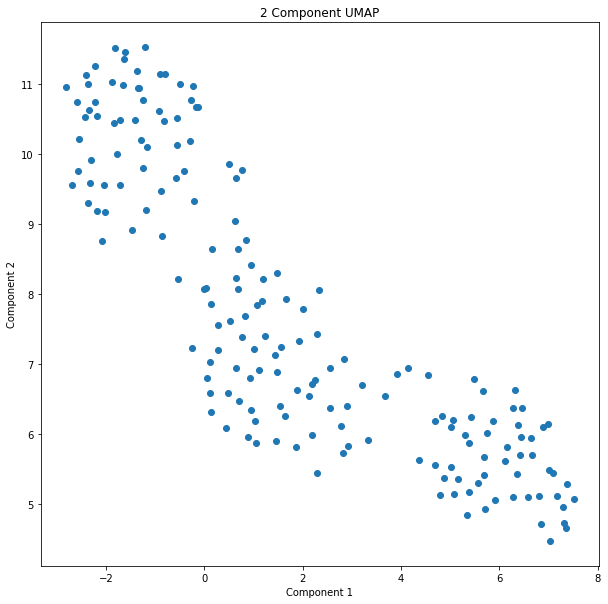

In [62]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)